# 分布

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

## Stacked Histogram


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg = mpg.rename(columns={"class": "types"})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,types
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


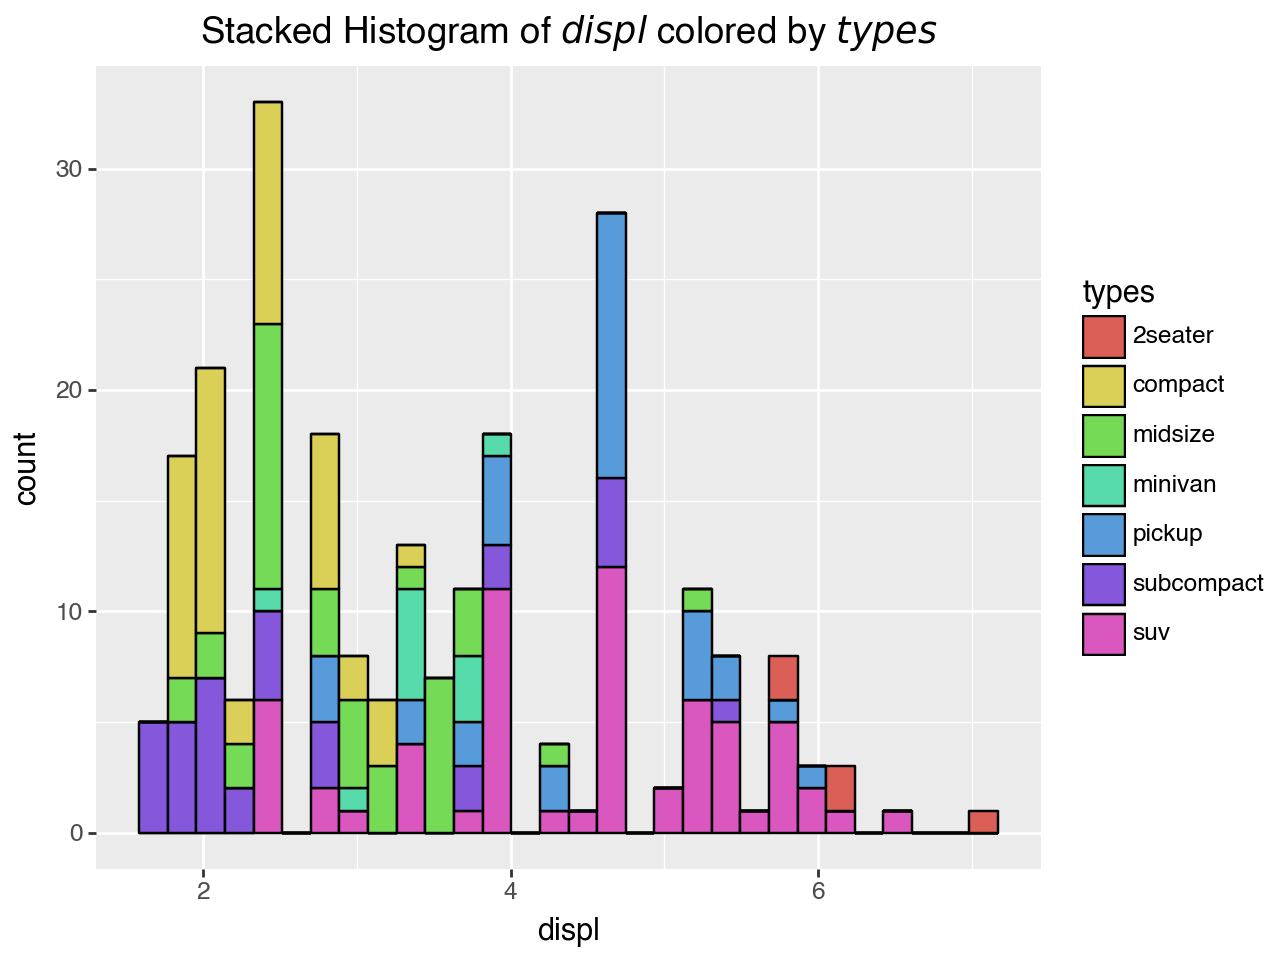

In [3]:
x_var, group_var = "displ", "types"

(
    ggplot(mpg, aes("displ", fill="types"))
    + geom_histogram(bins=30, color="black")
    + labs(title=f"Stacked Histogram of ${x_var}$ colored by ${group_var}$")
)

## Density


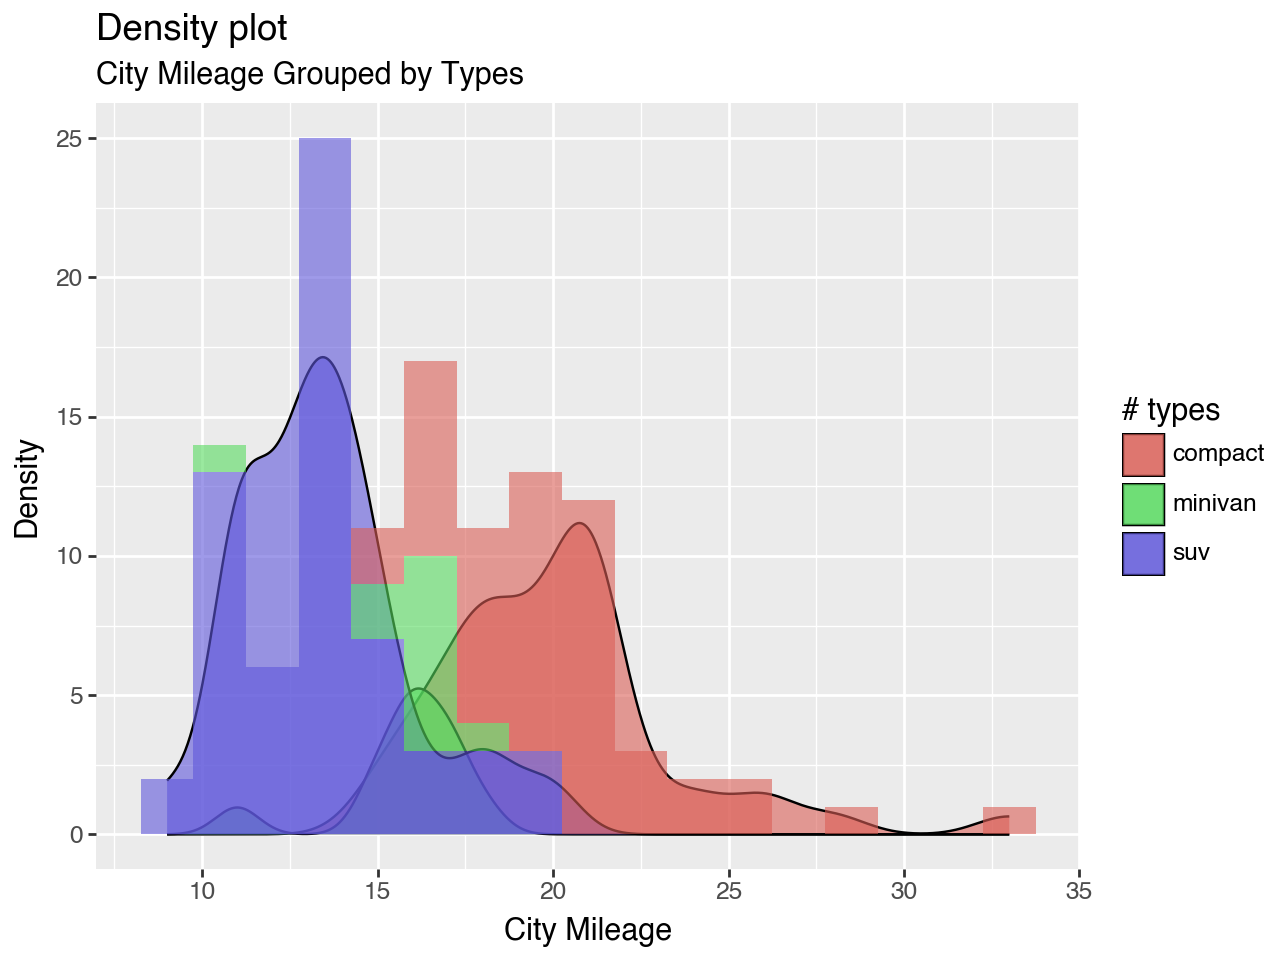

In [4]:
mpg_selected = mpg.query("types in ['compact', 'suv', 'minivan']")
binwidth = 1.5

(
    ggplot(mpg_selected, aes("cty", fill="types"))
    + geom_density(aes(y=after_stat("count*binwidth")), alpha=0.6)
    + geom_histogram(
        aes(fill="types", y=after_stat("count")),
        binwidth=binwidth,
        color="none",
        alpha=0.6,
    )
    + labs(
        title="Density plot",
        subtitle="City Mileage Grouped by Types",
        x="City Mileage",
        y="Density",
        fill="# types",
    )
)

## Box


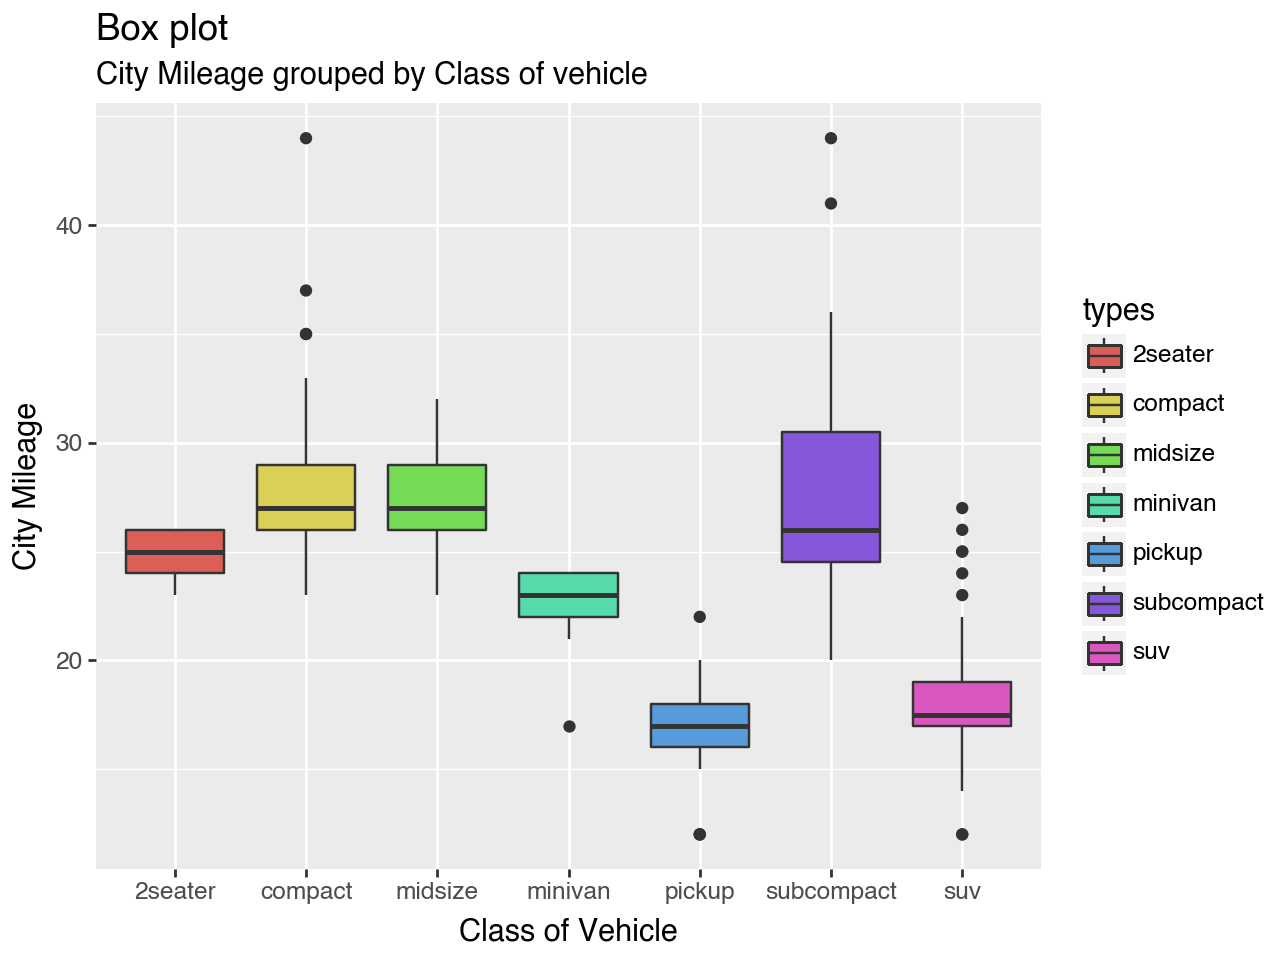

In [5]:
(
    ggplot(mpg, aes("types", "hwy"))
    + geom_boxplot(aes(fill="types"), notch=False)
    + labs(
        title="Box plot",
        subtitle="City Mileage grouped by Class of vehicle",
        x="Class of Vehicle",
        y="City Mileage",
    )
)

## Pyramid


In [6]:
email = pd.read_csv("data/email_campaign_funnel.csv")
email.head()

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06


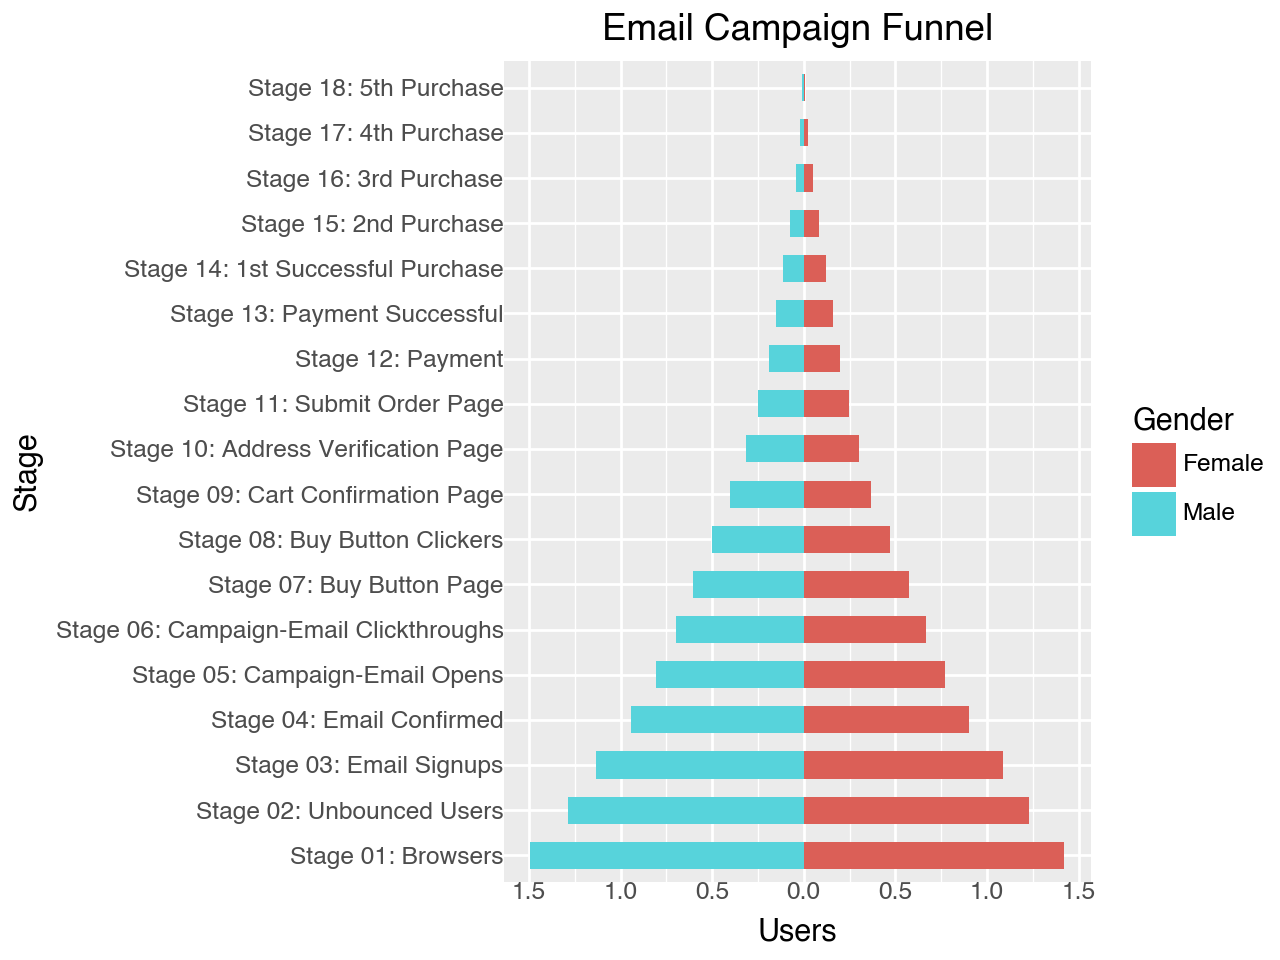

In [7]:
(
    ggplot(email, aes(x="Stage", y="Users", fill="Gender"))
    + geom_bar(stat="identity", width=0.6)  # Fill column
    + scale_y_continuous(
        breaks=np.arange(-1.5e7, 2e7, 5e6),
        labels=[*np.arange(1.5, 0, -0.5), *np.arange(0, 2, 0.5)],
    )
    + coord_flip()
    + labs(title="Email Campaign Funnel")
    + theme(plot_title=element_text(hjust=0.5), axis_ticks=element_blank())
)